# Aims


The aim is to identify significant factors that affect the Work and health of the employee in Yorkshire.

To offer suggestions that can address the effect of the work and wellbeing of the employee and overall economic growth of the Yorkshire and Humber region.

# Contents

1. Libraries importation
2. Data Importation and Exploration
3. Data preprocessing and preparation
4. Model Training and Result Evaluation
5. Tuning the hyper-parameter estimators
6. Diagnostic through learning curves
7  Combined voting esembling
8. Model deployment 
9. Conclusion

# Libraries importation

In [653]:
# Modules needed
import sys
# scipy # for statistics
import scipy
# numpy for array, matrix and vector calculations
import numpy as np
# matplotlib for graphs
import pandas as pd
# scikit-learn for machine learning
import sklearn

# Load  specialised libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# model selection
from sklearn import model_selection
# kpi: evaulating the performance of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score
# the stars of the show: the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Data Importation and Exploration

In [654]:
df = pd.read_csv(r'C:/Users/vince/Desktop/Data/saving_data.csv')



In [655]:
df.tail()

,Year,Part_time,YorkshireDaylost,HoursWorked,WeeklyPay,EmploymentAged16_19,EmploymentAged20to24,EmploymentAge25_49,EmploymentAge50Above,EmploymentAge64above,...,10_PERCENTILE_INCOME,TOTAL_20_PERCENTILE,TOTAL_25_PERCENTILE,TOTAL_30_PERCENTILE,TOTAL_40_PERCENTILE,TOTAL_60_PERCENTILE,TOTAL_70_PERCENTILE,TOTAL_75_PERCENTILE,TOTAL_80_PERCENTILE,TOTAL_90_PERCENTILE
63,2019Q4,621900,13.20,33.10,516.20,79100.00,243400.00,1408900,841100,2487300.00,...,135.00,215.60,256.40,289.00,333.90,447.10,524.50,574.90,632.40,813.00
64,2020Q1,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80
65,2020Q2,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80
66,2020Q3,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80
67,2020Q4,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80


In [393]:
#miss_var = ['Unnamed: 154','Unnamed: 155','Unnamed: 156','Unnamed: 153' ]
#data.drop(miss_var, axis = 1, inplace= True)

In [47]:
#df= df.fillna(df.mean())



In [196]:
df.head()

,Year,Part_time,YorkshireDaylost,HoursWorked,WeeklyPay,EmploymentAged16_19,EmploymentAged20to24,EmploymentAge25_49,EmploymentAge50Above,EmploymentAge64above,...,10_PERCENTILE_INCOME,TOTAL_20_PERCENTILE,TOTAL_25_PERCENTILE,TOTAL_30_PERCENTILE,TOTAL_40_PERCENTILE,TOTAL_60_PERCENTILE,TOTAL_70_PERCENTILE,TOTAL_75_PERCENTILE,TOTAL_80_PERCENTILE,TOTAL_90_PERCENTILE
0,2004Q1,608900,14.50,34.50,371.30,97293.75,237468.75,1396650,703925,2370987.50,...,88.00,146.40,171.10,190.10,226.80,306.10,362.00,398.90,441.50,566.20
1,2004Q2,608900,14.50,34.50,371.30,97293.75,237468.75,1396650,703925,2370987.50,...,88.00,146.40,171.10,190.10,226.80,306.10,362.00,398.90,441.50,566.20
2,2004Q3,608900,14.50,34.50,371.30,97293.75,237468.75,1396650,703925,2370987.50,...,88.00,146.40,171.10,190.10,226.80,306.10,362.00,398.90,441.50,566.20
3,2004Q4,608900,14.50,34.50,371.30,97293.75,237468.75,1396650,703925,2370987.50,...,88.00,146.40,171.10,190.10,226.80,306.10,362.00,398.90,441.50,566.20
4,2005Q1,606900,13.90,33.90,382.40,132200.00,231100.00,1400300,605300,2334700.00,...,91.40,151.00,177.80,200.00,235.60,317.50,379.50,412.70,460.70,592.50


In [197]:
df.tail()

,Year,Part_time,YorkshireDaylost,HoursWorked,WeeklyPay,EmploymentAged16_19,EmploymentAged20to24,EmploymentAge25_49,EmploymentAge50Above,EmploymentAge64above,...,10_PERCENTILE_INCOME,TOTAL_20_PERCENTILE,TOTAL_25_PERCENTILE,TOTAL_30_PERCENTILE,TOTAL_40_PERCENTILE,TOTAL_60_PERCENTILE,TOTAL_70_PERCENTILE,TOTAL_75_PERCENTILE,TOTAL_80_PERCENTILE,TOTAL_90_PERCENTILE
63,2019Q4,621900,13.20,33.10,516.20,79100.00,243400.00,1408900,841100,2487300.00,...,135.00,215.60,256.40,289.00,333.90,447.10,524.50,574.90,632.40,813.00
64,2020Q1,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80
65,2020Q2,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80
66,2020Q3,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80
67,2020Q4,583900,10.20,32.60,518.40,88500.00,246800.00,1419800,837300,2500300.00,...,134.70,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80


In [657]:
df.shape

(68, 57)

In [8]:
#plt.figure(figsize=(20,10))
#plt.rcParams['figure.figsize'] = (15,10)

<Figure size 1440x720 with 0 Axes>

In [198]:
df.isnull().sum()

Year                                                0
Part_time                                           0
YorkshireDaylost                                    0
HoursWorked                                         0
WeeklyPay                                           0
EmploymentAged16_19                                 0
EmploymentAged20to24                                0
EmploymentAge25_49                                  0
EmploymentAge50Above                                0
EmploymentAge64above                                0
Managers_directors_and_senior officials             0
 Professional_occupations                           0
Healthprofessionals                                 0
Associate_professional_and_technical_occupations    0
Skilled_trades_occupations                          0
Sales_customer_service                              0
Elementary                                          0
Employer_size_10_to19                               0
Employersize20_to_49        

In [199]:
df.describe()

,Part_time,YorkshireDaylost,HoursWorked,WeeklyPay,EmploymentAged16_19,EmploymentAged20to24,EmploymentAge25_49,EmploymentAge50Above,EmploymentAge64above,Managers_directors_and_senior officials,...,10_PERCENTILE_INCOME,TOTAL_20_PERCENTILE,TOTAL_25_PERCENTILE,TOTAL_30_PERCENTILE,TOTAL_40_PERCENTILE,TOTAL_60_PERCENTILE,TOTAL_70_PERCENTILE,TOTAL_75_PERCENTILE,TOTAL_80_PERCENTILE,TOTAL_90_PERCENTILE
count,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,...,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00
mean,621235.29,12.52,33.42,445.04,97293.75,237468.75,1396650.00,703925.00,2370987.50,9.42,...,109.59,181.53,215.86,242.49,287.49,390.32,462.67,506.93,560.26,720.82
std,24707.17,1.33,0.47,41.35,15948.70,11966.26,22036.39,78330.87,74458.20,0.43,...,13.22,20.46,25.11,29.72,33.75,43.93,50.11,54.83,59.42,77.54
min,583900.00,10.20,32.60,371.30,79100.00,215900.00,1355100.00,605300.00,2259700.00,8.50,...,88.00,146.40,171.10,190.10,226.80,306.10,362.00,398.90,441.50,566.20
25%,606900.00,11.30,33.10,426.10,83200.00,231100.00,1380800.00,643400.00,2334500.00,9.20,...,98.20,165.10,198.00,221.40,260.60,358.30,424.80,469.60,522.00,666.10
50%,615200.00,12.70,33.30,441.80,92900.00,238200.00,1400300.00,697600.00,2350600.00,9.40,...,108.40,180.90,217.40,243.50,294.40,400.40,478.00,522.00,574.90,747.40
75%,635300.00,13.40,33.80,467.70,109000.00,246800.00,1416000.00,769300.00,2420100.00,9.70,...,116.90,191.40,227.70,257.30,306.60,417.70,492.60,538.80,596.40,766.60
max,673400.00,14.80,34.50,518.40,132200.00,253300.00,1423400.00,841100.00,2500300.00,10.10,...,135.00,219.20,261.00,296.50,345.00,459.60,536.60,587.70,649.10,839.80


In [104]:
# Using histogram graph to view the distribution of the selected features
#df.hist(figsize =(20, 10))

In [140]:
#data = df.apply(pd.to_numeric, errors='coerce')

In [141]:
#data.fillna(0, inplace=True)

In [202]:
data = df.drop('Year',axis=1)

In [72]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#data = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

# Noramalization and Feature Scalling

In [203]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
data=pd.DataFrame(min_max.fit_transform(data), columns=data.columns)

In [204]:
data.tail()

,Part_time,YorkshireDaylost,HoursWorked,WeeklyPay,EmploymentAged16_19,EmploymentAged20to24,EmploymentAge25_49,EmploymentAge50Above,EmploymentAge64above,Managers_directors_and_senior officials,...,10_PERCENTILE_INCOME,TOTAL_20_PERCENTILE,TOTAL_25_PERCENTILE,TOTAL_30_PERCENTILE,TOTAL_40_PERCENTILE,TOTAL_60_PERCENTILE,TOTAL_70_PERCENTILE,TOTAL_75_PERCENTILE,TOTAL_80_PERCENTILE,TOTAL_90_PERCENTILE
63,0.42,0.65,0.26,0.99,0.00,0.74,0.79,1.00,0.95,0.94,...,1.00,0.95,0.95,0.93,0.91,0.92,0.93,0.93,0.92,0.90
64,0.00,0.00,0.00,1.00,0.18,0.83,0.95,0.98,1.00,0.88,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
65,0.00,0.00,0.00,1.00,0.18,0.83,0.95,0.98,1.00,0.88,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
66,0.00,0.00,0.00,1.00,0.18,0.83,0.95,0.98,1.00,0.88,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
67,0.00,0.00,0.00,1.00,0.18,0.83,0.95,0.98,1.00,0.88,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Features Selection 

In [ ]:
From above table, we have more than 57 variables. The question is that, would all these variable be relevant for our model? 
Our concens is that, we don't want to include irrelevant variable in building our model, because existence of the irrelevant variables 
will exagerate the result. In this case,the training model will be inconsistence and less precise. 

To identify irrelevant variables and select important variables for the predictive model,
the following tests are considered for variable selection.
1.Weight of evidence (WOE) and Information value (IV) 
2.Random Forest
3.Recursive Feature Elimination
4.Chi Square test
5.Linear Support Vector Classificatio
6.Extratrees Classifier
7.LogisticRegression
Note that, we combined all these tests because each of the test has advantage and disadvantage 

In [205]:
features = data.drop('YorkshireDaylost',axis=1)
labels = data['YorkshireDaylost']

In [12]:
#features = data.drop('Year',axis=1)

In [7]:
#features = features.apply(pd.to_numeric, errors='coerce')
#labels = labels.apply(pd.to_numeric, errors='coerce')

In [8]:
#features.fillna(0, inplace=True)
#labels.fillna(0, inplace=True)

In [331]:
###RandomForestClassifier

In [280]:
#from sklearn.cross_validation import train_test_split

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

In [281]:
#X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)
#clf = LinearRegression().fit(X_train, y_train)

# Feature selection using Weight of evidence (WOE) and Information value (IV)

In [206]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1
    
    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 
    

In [207]:
final_iv, IV = data_vars(data, data.YorkshireDaylost)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vince\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vince\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vince\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vince\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vince\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = geta

In [208]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
12,EmploymentAge50Above,1.41
52,working _above_45_hours,1.04
1,10_PERCENTILE_INCOME,1.04
27,Male_annual_pay_gross(20 percentile),1.04
37,TOTAL_20_PERCENTILE,1.04
39,TOTAL_30_PERCENTILE,1.04
30,Male_annual_pay_gross_(40 percentile),1.04
29,Male_annual_pay_gross(80 percentile),1.04
28,Male_annual_pay_gross(60 percentile),1.04
40,TOTAL_40_PERCENTILE,1.04


# RandomForestClassifier

In [209]:

from sklearn import utils
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(labels)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(labels))
print(utils.multiclass.type_of_target(labels.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[13 13 13 13 11 11 11 11 12 12 12 12 14 14 14 14 10 10 10 10  6  6  6  6
  5  5  5  5  1  1  1  1  7  7  7  7  3  3  3  3  2  2  2  2  4  4  4  4
  8  8  8  8  2  2  2  2  8  8  8  8  9  9  9  9  0  0  0  0]
continuous
binary
multiclass


In [210]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features, training_scores_encoded)
preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,training_scores_encoded)
print(accuracy)


1.0


In [211]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [212]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
35,Mealth_Health,0.05
1,HoursWorked,0.04
36,Prologed_Sick_leave,0.04
40,working _above_45_hours,0.03
45,10_PERCENTILE_INCOME,0.03
38,working_10 _to_34_hours,0.03
0,Part_time,0.03
10,Healthprofessionals,0.03
6,EmploymentAge50Above,0.03
31,Aged_16_64_ Employment,0.03


# LogisticRegression

In [213]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model,30)
fit = rfe.fit(features, training_scores_encoded)
#print("LogisticRegression")
#print(clf.predict(prediction_data_test))

C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [214]:
from pandas import DataFrame
LOGSTIC = DataFrame(rfe.support_, columns = ["LOGSTIC"], index=features.columns)
LOGSTIC = LOGSTIC.reset_index()

In [215]:
LOGSTIC[LOGSTIC['LOGSTIC'] == True]

,index,LOGSTIC
0,Part_time,True
1,HoursWorked,True
3,EmploymentAged16_19,True
4,EmploymentAged20to24,True
5,EmploymentAge25_49,True
6,EmploymentAge50Above,True
8,Managers_directors_and_senior officials,True
10,Healthprofessionals,True
11,Associate_professional_and_technical_occupations,True
12,Skilled_trades_occupations,True


# Xgboost

Feature: 0, Score: 0.00890
Feature: 1, Score: 0.34434
Feature: 2, Score: 0.01873
Feature: 3, Score: 0.04206
Feature: 4, Score: 0.00010
Feature: 5, Score: 0.00335
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01451
Feature: 9, Score: 0.00083
Feature: 10, Score: 0.28052
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00168
Feature: 13, Score: 0.02183
Feature: 14, Score: 0.04331
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00011
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.13669
Feature: 35, Score: 0.00000
Fe

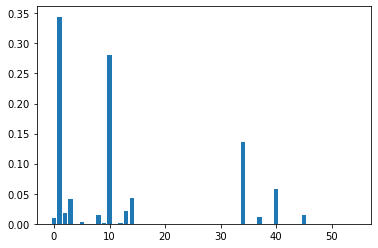

In [216]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
model = XGBRegressor()
# define dataset
# fit the model
model.fit(features,labels)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [217]:
from pandas import DataFrame
VII = DataFrame(model.feature_importances_, columns = ["XGB"], index=features.columns)

In [218]:
VII = VII.reset_index()
VII.sort_values(['XGB'],ascending=0)

,index,XGB
1,HoursWorked,0.34
10,Healthprofessionals,0.28
34,Associate_Prof&Tech_Occupations_Construction,0.14
40,working _above_45_hours,0.06
14,Elementary,0.04
3,EmploymentAged16_19,0.04
13,Sales_customer_service,0.02
2,WeeklyPay,0.02
8,Managers_directors_and_senior officials,0.01
45,10_PERCENTILE_INCOME,0.01


#  KNeighborsRegressor

Feature: 0, Score: -0.00028
Feature: 1, Score: -0.00035
Feature: 2, Score: -0.00037
Feature: 3, Score: 0.00006
Feature: 4, Score: -0.00019
Feature: 5, Score: -0.00017
Feature: 6, Score: -0.00043
Feature: 7, Score: -0.00018
Feature: 8, Score: 0.00001
Feature: 9, Score: -0.00060
Feature: 10, Score: 0.00020
Feature: 11, Score: -0.00065
Feature: 12, Score: -0.00056
Feature: 13, Score: -0.00065
Feature: 14, Score: -0.00080
Feature: 15, Score: -0.00008
Feature: 16, Score: -0.00003
Feature: 17, Score: -0.00040
Feature: 18, Score: -0.00036
Feature: 19, Score: 0.00011
Feature: 20, Score: 0.00008
Feature: 21, Score: -0.00060
Feature: 22, Score: -0.00003
Feature: 23, Score: -0.00056
Feature: 24, Score: -0.00055
Feature: 25, Score: -0.00050
Feature: 26, Score: -0.00061
Feature: 27, Score: -0.00072
Feature: 28, Score: -0.00052
Feature: 29, Score: -0.00036
Feature: 30, Score: -0.00037
Feature: 31, Score: 0.00006
Feature: 32, Score: -0.00008
Feature: 33, Score: -0.00060
Feature: 34, Score: -0.00065
F

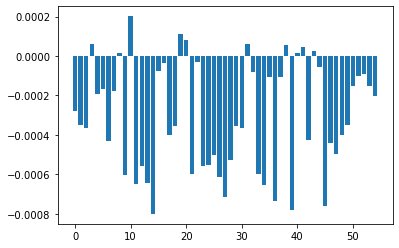

In [219]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
model = KNeighborsRegressor()
# fit the model
model.fit(features,labels)
# perform permutation importance
results = permutation_importance(model,features,labels, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Chi Sequre

In [220]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), training_scores_encoded)

In [221]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [222]:
chi_sq = chi_sq.reset_index()

In [223]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
19,income_support,23.01
15,Employer_size_10_to19,21.82
6,EmploymentAge50Above,17.31
3,EmploymentAged16_19,16.95
38,working_10 _to_34_hours,16.78
32,Unemployed,15.48
10,Healthprofessionals,14.56
31,Aged_16_64_ Employment,14.14
42,Female_Total_Labourforce,13.67
22,aged16_64_employment rate_ethnic_minority,13.29


# Feature importance with ExtraTreesClassifier

In [224]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, training_scores_encoded)

print(model.feature_importances_)

[0.01885918 0.02197998 0.02230074 0.01591862 0.01387559 0.01825657
 0.02210839 0.01751209 0.01522388 0.01324313 0.0344739  0.00870507
 0.01647365 0.01485582 0.01273399 0.01712653 0.01435146 0.01635212
 0.01430139 0.02462237 0.01548836 0.01026236 0.01701362 0.02205089
 0.01965867 0.0184846  0.02972406 0.02392828 0.01683283 0.0201176
 0.02150373 0.02312514 0.01756169 0.01101013 0.02249751 0.01921316
 0.03114272 0.01883022 0.01771782 0.01784252 0.03067092 0.
 0.00621283 0.00824627 0.01394708 0.02397355 0.0191364  0.01949834
 0.02266781 0.02182081 0.01874679 0.01855315 0.01640216 0.01705188
 0.01579161]


In [225]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [226]:
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
10,Healthprofessionals,0.03
36,Prologed_Sick_leave,0.03
40,working _above_45_hours,0.03
26,Female_annual_pay_gross (80 percentile),0.03
19,income_support,0.02
45,10_PERCENTILE_INCOME,0.02
27,Male_annual_pay_gross(20 percentile),0.02
31,Aged_16_64_ Employment,0.02
48,TOTAL_30_PERCENTILE,0.02
34,Associate_Prof&Tech_Occupations_Construction,0.02


# Linear Support Vector Classification (L2)

In [227]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features,  training_scores_encoded)
model = SelectFromModel(lsvc,prefit=True)

In [228]:
from pandas import DataFrame
l2 = DataFrame(model.get_support(), columns = ["L2"], index=features.columns)
l2 = l2.reset_index()

In [229]:
l2[l2['L2'] == True]

,index,L2


# We combine all these tests together

In [230]:
from functools import reduce
dfs = [IV,VI, LOGSTIC, VII, chi_sq, FI, l2]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [231]:

columns = ['IV', 'RF', 'XGB','Chi_Square', 'Extratrees']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['LOGSTIC'] = final_results['LOGSTIC'].astype(int)
score_table['L2'] = final_results['L2'].astype(int)
#score_table['Extratrees'] = final_results['Extratrees'].astype(int)

In [232]:
score_table['final_score'] = score_table.sum(axis=1)

In [233]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,XGB,Chi_Square,Extratrees,LOGSTIC,L2,final_score
52,working _above_45_hours,1,1,1,0,1,1,0,5
24,Healthprofessionals,0,0,1,0,1,1,0,3
25,HoursWorked,0,1,1,0,0,1,0,3
51,income_support,0,0,0,1,1,1,0,3
34,Prologed_Sick_leave,0,1,0,0,1,1,0,3
12,EmploymentAge50Above,1,0,0,1,0,1,0,3
32,Mealth_Health,0,1,0,0,0,1,0,2
1,10_PERCENTILE_INCOME,1,1,0,0,0,0,0,2
14,EmploymentAged16_19,0,0,0,1,0,1,0,2
11,EmploymentAge25_49,1,0,0,0,0,1,0,2


In [234]:
feature = features[list(score_table[score_table['final_score'] >=2 ]['index'])]

In [235]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   10_PERCENTILE_INCOME                          68 non-null     float64
 1   Aged_16_64_ Employment                        68 non-null     float64
 2   Associate_Prof&Tech_Occupations_Construction  68 non-null     float64
 3   Employer_size_10_to19                         68 non-null     float64
 4   EmploymentAge25_49                            68 non-null     float64
 5   EmploymentAge50Above                          68 non-null     float64
 6   EmploymentAged16_19                           68 non-null     float64
 7   Healthprofessionals                           68 non-null     float64
 8   HoursWorked                                   68 non-null     float64
 9   Mealth_Health                                 68 non-null     float

In [236]:
feature.isnull().mean().sort_values(ascending=False)*100

working_10 _to_34_hours                        0.00
working _above_45_hours                        0.00
income_support                                 0.00
Prologed_Sick_leave                            0.00
Mealth_Health                                  0.00
HoursWorked                                    0.00
Healthprofessionals                            0.00
EmploymentAged16_19                            0.00
EmploymentAge50Above                           0.00
EmploymentAge25_49                             0.00
Employer_size_10_to19                          0.00
Associate_Prof&Tech_Occupations_Construction   0.00
Aged_16_64_ Employment                         0.00
10_PERCENTILE_INCOME                           0.00
dtype: float64

In [42]:
#fig, ax = plt.subplots(figsize=(12,8))         
#cm_df = sns.heatmap(features.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [237]:
data = pd.concat([labels, feature], axis=1)

In [297]:
#data = pd.concat([feature, labels], axis=1)

In [238]:
data.head()

,YorkshireDaylost,10_PERCENTILE_INCOME,Aged_16_64_ Employment,Associate_Prof&Tech_Occupations_Construction,Employer_size_10_to19,EmploymentAge25_49,EmploymentAge50Above,EmploymentAged16_19,Healthprofessionals,HoursWorked,Mealth_Health,Prologed_Sick_leave,income_support,working _above_45_hours,working_10 _to_34_hours
0,0.93,0.00,0.29,0.81,0.00,0.61,0.42,0.34,0.12,1.00,0.47,0.57,1.00,0.53,0.48
1,0.93,0.00,0.29,0.81,0.00,0.61,0.42,0.34,0.12,1.00,0.47,0.57,1.00,0.53,0.48
2,0.93,0.00,0.29,0.81,0.00,0.61,0.42,0.34,0.12,1.00,0.47,0.57,1.00,0.53,0.48
3,0.93,0.00,0.29,0.81,0.00,0.61,0.42,0.34,0.12,1.00,0.47,0.57,1.00,0.53,0.48
4,0.80,0.07,0.35,0.81,0.00,0.66,0.00,1.00,0.00,0.68,0.47,0.57,0.97,1.00,0.01


<AxesSubplot:>

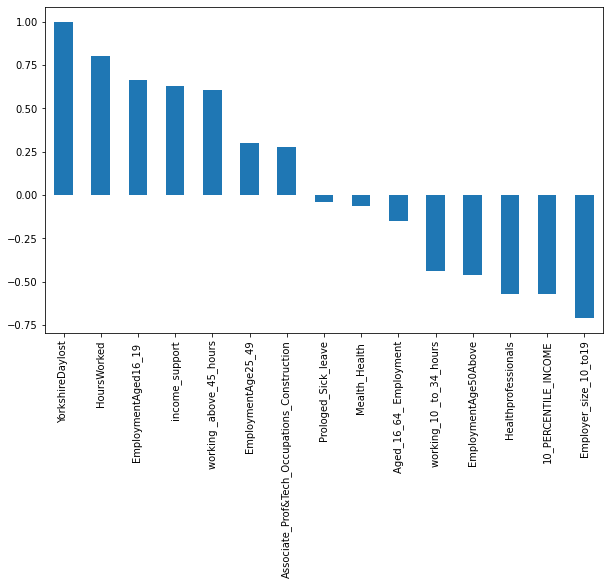

In [239]:
plt.figure(figsize=(10,6))
data.corr()['YorkshireDaylost'].sort_values(ascending=False).plot.bar()

<AxesSubplot:>

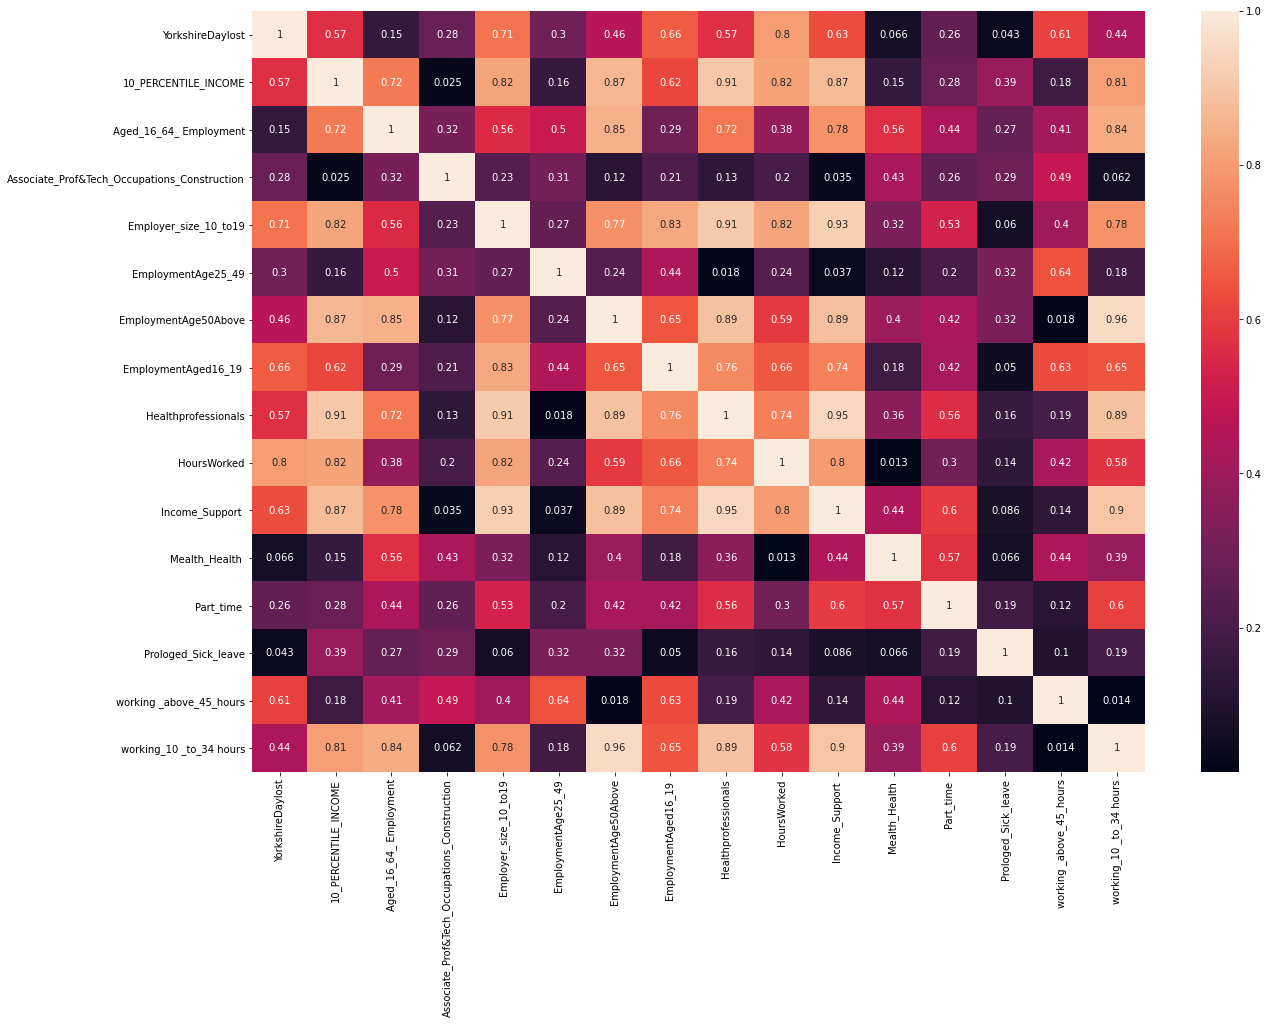

In [421]:
import seaborn as sns
plt.figure(figsize=(20,14))
#plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr().abs(),annot=True)

array([[<AxesSubplot:title={'center':'YorkshireDaylost'}>,
        <AxesSubplot:title={'center':'10_PERCENTILE_INCOME'}>,
        <AxesSubplot:title={'center':'Aged_16_64_ Employment'}>,
        <AxesSubplot:title={'center':'Associate_Prof&Tech_Occupations_Construction'}>],
       [<AxesSubplot:title={'center':'Employer_size_10_to19'}>,
        <AxesSubplot:title={'center':'EmploymentAge25_49'}>,
        <AxesSubplot:title={'center':'EmploymentAge50Above'}>,
        <AxesSubplot:title={'center':'EmploymentAged16_19 '}>],
       [<AxesSubplot:title={'center':'Healthprofessionals'}>,
        <AxesSubplot:title={'center':'HoursWorked'}>,
        <AxesSubplot:title={'center':'Mealth_Health '}>,
        <AxesSubplot:title={'center':'Prologed_Sick_leave'}>],
       [<AxesSubplot:title={'center':'income_support'}>,
        <AxesSubplot:title={'center':'working _above_45_hours'}>,
        <AxesSubplot:title={'center':'working_10 _to_34_hours'}>,
        <AxesSubplot:>]], dtype=object)

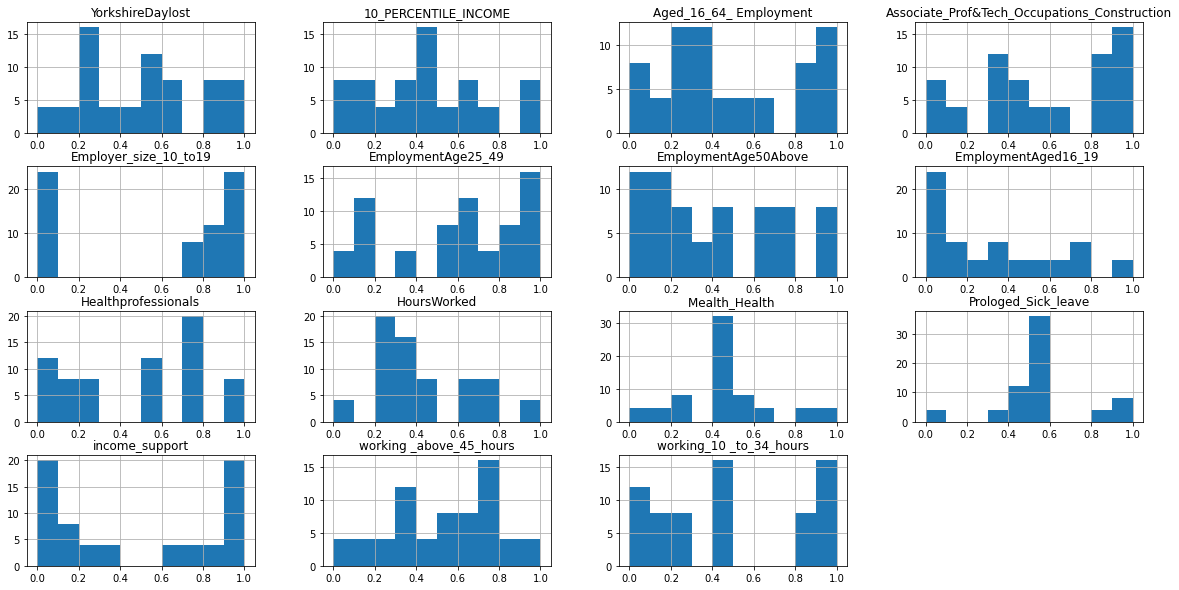

In [240]:
data.hist(figsize =(20, 10))

In [397]:
data.describe()

,YorkshireDaylost,10_PERCENTILE_INCOME,Aged_16_64_ Employment,Associate_Prof&Tech_Occupations_Construction,Employer_size_10_to19,EmploymentAge25_49,EmploymentAge50Above,EmploymentAged16_19,Healthprofessionals,HoursWorked,Mealth_Health,Prologed_Sick_leave,income_support,working _above_45_hours,working_10 _to_34_hours
count,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-1.76,-1.65,-1.50,-1.76,-1.34,-1.90,-1.27,-1.15,-1.49,-1.76,-2.10,-2.56,-1.18,-2.02,-1.36
25%,-0.93,-0.87,-0.61,-0.67,-1.34,-0.72,-0.78,-0.89,-0.94,-0.69,-0.15,-0.38,-0.98,-0.65,-0.87
50%,0.14,-0.09,-0.40,-0.17,0.55,0.17,-0.08,-0.28,0.15,-0.26,-0.00,0.00,-0.21,-0.00,0.00
75%,0.67,0.56,1.05,0.83,0.81,0.88,0.84,0.74,0.88,0.80,0.22,0.00,1.15,0.80,1.08
max,1.73,1.94,1.60,1.33,0.99,1.22,1.76,2.20,1.61,2.30,2.39,1.95,1.31,1.80,1.45


In [ ]:
#var_del = [ 'Disabled people','Prologed_Sick_leave','V22','V23','V15','V13','V24']
#data.drop(var_del,axis = 1, inplace= True)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#min_max=MinMaxScaler()
#data=pd.DataFrame(min_max.fit_transform(data), columns=data.columns)

In [241]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['YorkshireDaylost'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.884899430057233
p-value: 0.3391978983755777
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [243]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['10_PERCENTILE_INCOME'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -0.3874595362981214
p-value: 0.9121716240519602
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [244]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Associate_Prof&Tech_Occupations_Construction'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.9171064853100857
p-value: 0.32405696511432025
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [245]:
result = adfuller(data['working _above_45_hours'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.7834811564212945
p-value: 0.38869312967070807
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [246]:
result = adfuller(data['income_support'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.3039181196283933
p-value: 0.6273778681589031
critical_values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}


In [247]:
result = adfuller(data['Prologed_Sick_leave'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -2.2843391880523294
p-value: 0.17706865175425718
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [249]:
result = adfuller(data['Mealth_Health '])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.9064533366784095
p-value: 0.32903137421209694
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [250]:
result = adfuller(data['HoursWorked'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.8565439009416074
p-value: 0.35277205649170296
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [251]:
result = adfuller(data['Healthprofessionals'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.0538234551127819
p-value: 0.7331311392793101
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [252]:
result = adfuller(data['EmploymentAge25_49'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.1598768945187297
p-value: 0.6906132733965527
critical_values: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}


In [253]:
result = adfuller(data['Aged_16_64_ Employment'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

Test Statistics: -1.0651711639533097
p-value: 0.72875958312895
critical_values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}


In [ ]:
result = adfuller(data['Aged_16_64_ Employment'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

# Data Transformation

In [447]:
df_transformed = data.diff().dropna()
df = data.iloc[1:]
print(data.shape)
df_transformed.shape

(68, 15)


(67, 15)

In [256]:
result = adfuller(df_transformed['YorkshireDaylost'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -5.645934341676672
p-value: 1.0113854099487663e-06
critical_values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}
Series is stationary


In [257]:
result = adfuller(df_transformed['10_PERCENTILE_INCOME'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -8.776588355106233
p-value: 2.4395166842841273e-14
critical_values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
Series is stationary


In [258]:
result = adfuller(df_transformed['Associate_Prof&Tech_Occupations_Construction'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -8.001867829840686
p-value: 2.3223459311180275e-12
critical_values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
Series is stationary


In [259]:
result = adfuller(df_transformed['working _above_45_hours'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -8.001943741671562
p-value: 2.321315377958082e-12
critical_values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
Series is stationary


In [264]:
result = adfuller(df_transformed['income_support'])
print(f'Test Statistics: {result[1]}')
print(f'p-value: {result[0]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: 0.47110100525519316
p-value: -1.6231066000644456
critical_values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}
Series is not stationary


In [265]:
result = adfuller(df_transformed['Prologed_Sick_leave'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -3.845101048683905
p-value: 0.0024781524079889794
critical_values: {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}
Series is stationary


In [266]:
result = adfuller(df_transformed['Aged_16_64_ Employment'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -2.455378978706301
p-value: 0.1267118909336507
critical_values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}
Series is not stationary


In [267]:
result = adfuller(df_transformed['Employer_size_10_to19'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -8.224482553377078
p-value: 6.300062689357684e-13
critical_values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
Series is stationary


In [268]:
result = adfuller(df_transformed['HoursWorked'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -5.67463834817001
p-value: 8.761760674091439e-07
critical_values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}
Series is stationary


In [269]:
result = adfuller(df_transformed['Healthprofessionals'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -8.143450710459557
p-value: 1.013583463737242e-12
critical_values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
Series is stationary


In [271]:
result = adfuller(df_transformed['EmploymentAged16_19 '])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -8.003779086235069
p-value: 2.29653753782693e-12
critical_values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
Series is stationary


array([[<AxesSubplot:title={'center':'YorkshireDaylost'}>,
        <AxesSubplot:title={'center':'10_PERCENTILE_INCOME'}>,
        <AxesSubplot:title={'center':'Aged_16_64_ Employment'}>,
        <AxesSubplot:title={'center':'Associate_Prof&Tech_Occupations_Construction'}>],
       [<AxesSubplot:title={'center':'Employer_size_10_to19'}>,
        <AxesSubplot:title={'center':'EmploymentAge25_49'}>,
        <AxesSubplot:title={'center':'EmploymentAge50Above'}>,
        <AxesSubplot:title={'center':'EmploymentAged16_19 '}>],
       [<AxesSubplot:title={'center':'Healthprofessionals'}>,
        <AxesSubplot:title={'center':'HoursWorked'}>,
        <AxesSubplot:title={'center':'Mealth_Health '}>,
        <AxesSubplot:title={'center':'Prologed_Sick_leave'}>],
       [<AxesSubplot:title={'center':'income_support'}>,
        <AxesSubplot:title={'center':'working _above_45_hours'}>,
        <AxesSubplot:title={'center':'working_10 _to_34_hours'}>,
        <AxesSubplot:>]], dtype=object)

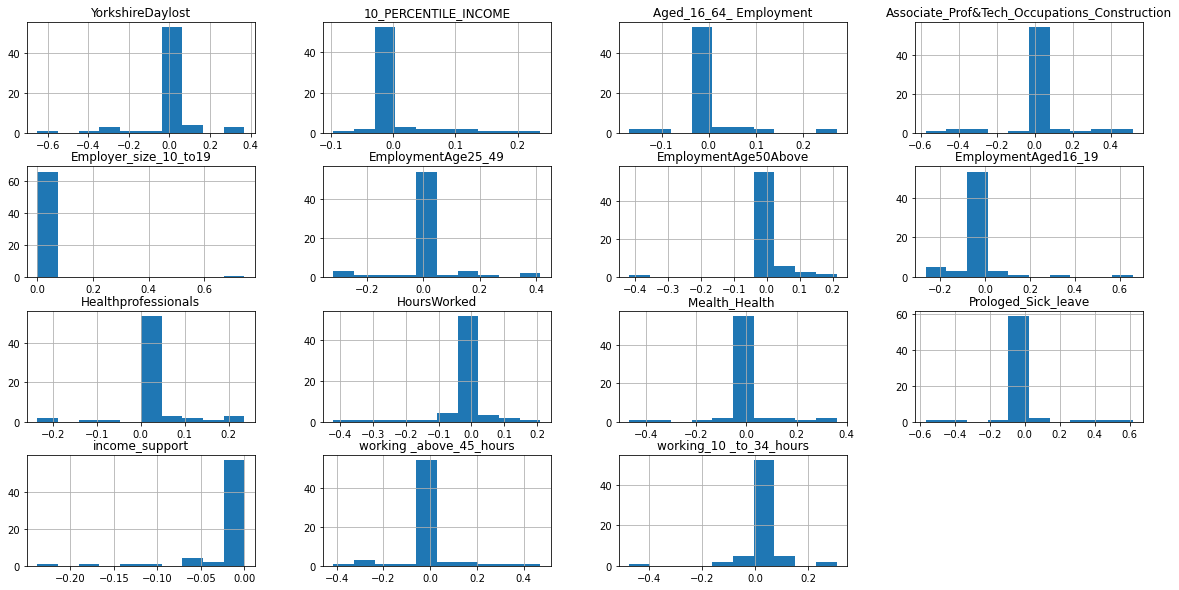

In [272]:
df_transformed.hist(figsize =(20, 10))



In [273]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)





In [280]:
x = df_transformed.drop('YorkshireDaylost',axis=1)
y = df_transformed['YorkshireDaylost']

In [281]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [60]:
import statsmodels.api as sm

In [282]:
x_train_sm = sm.add_constant(x_train)
x_train_sm

,const,10_PERCENTILE_INCOME,Aged_16_64_ Employment,Associate_Prof&Tech_Occupations_Construction,Employer_size_10_to19,EmploymentAge25_49,EmploymentAge50Above,EmploymentAged16_19,Healthprofessionals,HoursWorked,Mealth_Health,Prologed_Sick_leave,income_support,working _above_45_hours,working_10 _to_34_hours
20,1.00,0.18,-0.17,-0.03,0.00,-0.31,0.05,-0.08,0.12,-0.42,-0.47,0.00,-0.11,-0.41,0.14
7,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.07,0.07,0.00,0.00,0.05,-0.42,0.66,-0.12,-0.32,0.00,0.00,-0.03,0.47,-0.47
16,1.00,0.03,-0.12,-0.57,0.00,0.18,0.10,-0.11,0.12,0.05,0.00,0.00,-0.01,0.07,0.14
6,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1.00,0.11,-0.02,0.13,0.00,0.23,0.01,-0.21,0.00,-0.05,0.00,0.00,-0.00,-0.23,-0.01
38,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [284]:
lr = sm.OLS(y_train, x_train).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:       YorkshireDaylost   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.776e+29
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:20:27   Log-Likelihood:                          1801.4
No. Observations:                  53   AIC:                                     -3577.
Df Residuals:                      40   BIC:                                     -3551.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
As we can see, height and weight have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the height of a person does influence their weight. Hence, considering these two features together leads to a model with high multicollinearity.

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_transformed.values, i) for i in range(df_transformed.shape[1])]
vif["features"] = df_transformed.columns

In [286]:
vif.round(1)

,VIF Factor,features
0,1218.20,YorkshireDaylost
1,878.50,10_PERCENTILE_INCOME
2,6034.30,Aged_16_64_ Employment
3,1250.10,Associate_Prof&Tech_Occupations_Construction
4,181.20,Employer_size_10_to19
5,2142.20,EmploymentAge25_49
6,171.90,EmploymentAge50Above
7,1655.20,EmploymentAged16_19
8,16.60,Healthprofessionals
9,2678.10,HoursWorked


# Indicators exclusion 

In [348]:
miss_var = ['Aged_16_64_ Employment', 'EmploymentAge25_49','HoursWorked']
df_transformed.drop(miss_var, axis = 1, inplace= True) 

In [349]:
B = df_transformed.drop('YorkshireDaylost',axis=1)
C = df_transformed['YorkshireDaylost']

In [350]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(B,C,test_size = 0.2) 

In [351]:
x_train_C = sm.add_constant(x_train)
x_train_C

,const,10_PERCENTILE_INCOME,Associate_Prof&Tech_Occupations_Construction,Employer_size_10_to19,EmploymentAge50Above,EmploymentAged16_19,Healthprofessionals,Mealth_Health,Prologed_Sick_leave,income_support,working _above_45_hours,working_10 _to_34_hours
56,1.00,0.53,1.13,0.05,0.09,-0.29,0.73,0.19,-0.62,-0.14,0.50,-0.10
63,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
13,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36,1.00,-0.34,1.59,0.08,0.43,-0.22,0.00,0.94,-2.56,-0.41,0.56,-0.20
33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
42,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
64,1.00,-0.02,0.41,0.02,-0.05,0.59,-0.73,0.14,0.17,0.00,-0.92,-0.24


In [352]:
lr = sm.OLS(y_train, x_train).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:       YorkshireDaylost   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              179.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                    1.29e-31
Time:                        19:19:07   Log-Likelihood:                          64.392
No. Observations:                  53   AIC:                                     -106.8
Df Residuals:                      42   BIC:                                     -85.11
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_transformed.values, i) for i in range(df_transformed.shape[1])]
vif["features"] = df_transformed.columns

In [354]:
vif.round(1)

,VIF Factor,features
0,4.20,YorkshireDaylost
1,6.30,10_PERCENTILE_INCOME
2,6.30,Associate_Prof&Tech_Occupations_Construction
3,5.80,Employer_size_10_to19
4,8.90,EmploymentAge50Above
5,3.80,EmploymentAged16_19
6,5.50,Healthprofessionals
7,5.40,Mealth_Health
8,3.40,Prologed_Sick_leave
9,4.20,income_support


# Test for Model misspecification 

In [374]:
import statsmodels.regression.linear_model as rg
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as dg

df_transformed.loc[:, 'const'] = ct.add_constant(df_transformed) 
ydt = ['10_PERCENTILE_INCOME', 'Associate_Prof&Tech_Occupations_Construction', 'Employer_size_10_to19',
       'EmploymentAge50Above', 'EmploymentAged16_19 ', 'Healthprofessionals','Mealth_Health ','Prologed_Sick_leave', 
       'income_support', 'working _above_45_hours', 'working_10 _to_34_hours']

In [375]:
reg = rg.OLS(df_transformed['YorkshireDaylost'], df_transformed[ydt], hasconst=bool).fit()
reset = dg.linear_reset(reg, power=2, test_type='fitted', use_f=True)

C:\Users\vince\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [376]:
print('== Correct Function From Rasey-RESET Test ==')
print('')
print('Ramsey-RESET Test F-Statistics:', np.round(reset.fvalue, 6))
print('Ramsey-RESET Test P-Value:', np.round(reset.pvalue, 6))

== Correct Function From Rasey-RESET Test ==

Ramsey-RESET Test F-Statistics: [[0.772647]]
Ramsey-RESET Test P-Value: 0.383224


# Model respecification 

In [552]:
vmiss_var = ['working_10 _to_34_hours']
df_transformed.drop(vmiss_var, axis = 1, inplace= True)

In [579]:
D = df_transformed.drop('YorkshireDaylost',axis=1)
E = df_transformed['YorkshireDaylost']

In [580]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(D,E,test_size = 0.2) 

In [581]:
x_train_C = sm.add_constant(x_train)
#x_train_C

In [582]:
lr = sm.OLS(y_train, x_train_C).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       YorkshireDaylost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.801e+29
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:43:48   Log-Likelihood:                 1758.4
No. Observations:                  53   AIC:                            -3491.
Df Residuals:                      40   BIC:                            -3465.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# Model Respecifcation two

In [590]:
vmiss_var = ['Aged_16_64_ Employment', 'income_support']
df_transformed.drop(vmiss_var, axis = 1, inplace= True)

In [595]:
D = df_transformed.drop('YorkshireDaylost',axis=1)
E = df_transformed['YorkshireDaylost']

In [596]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(D,E,test_size = 0.2) 

In [597]:
lr = sm.OLS(y_train, x_train).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:       YorkshireDaylost   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              203.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                    1.58e-32
Time:                        00:52:46   Log-Likelihood:                          69.729
No. Observations:                  53   AIC:                                     -115.5
Df Residuals:                      41   BIC:                                     -91.81
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [598]:

df_transformed.loc[:, 'const'] = ct.add_constant(df_transformed) 
ydt = ['10_PERCENTILE_INCOME', 'Associate_Prof&Tech_Occupations_Construction', 'Employer_size_10_to19',
       'EmploymentAge50Above', 'EmploymentAged16_19 ', 'Healthprofessionals','Mealth_Health ','Prologed_Sick_leave', 
        'working _above_45_hours', 'working_10 _to_34_hours']

In [599]:
reg = rg.OLS(df_transformed['YorkshireDaylost'], df_transformed[ydt], hasconst=bool).fit()
reset = dg.linear_reset(reg, power=2, test_type='fitted', use_f=True)

C:\Users\vince\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1263: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


In [600]:
print('== Correct Function From Rasey-RESET Test ==')
print('')
print('Ramsey-RESET Test F-Statistics:', np.round(reset.fvalue, 6))
print('Ramsey-RESET Test P-Value:', np.round(reset.pvalue, 6))

== Correct Function From Rasey-RESET Test ==

Ramsey-RESET Test F-Statistics: [[1.404119]]
Ramsey-RESET Test P-Value: 0.24104


In [601]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_transformed.values, i) for i in range(df_transformed.shape[1])]
vif["features"] = df_transformed.columns

In [602]:
vif.round(1)

,VIF Factor,features
0,5.20,YorkshireDaylost
1,11.00,10_PERCENTILE_INCOME
2,9.00,Associate_Prof&Tech_Occupations_Construction
3,8.10,Employer_size_10_to19
4,4.10,EmploymentAge25_49
5,10.30,EmploymentAge50Above
6,4.00,EmploymentAged16_19
7,8.30,Healthprofessionals
8,4.40,HoursWorked
9,13.10,Mealth_Health


# After different specifcations

In [611]:
df_transformed = data.diff().dropna()
df = data.iloc[1:]
print(data.shape)
df_transformed.shape

(68, 15)


(67, 15)

In [612]:
vmiss_var = ['Aged_16_64_ Employment', 'EmploymentAge25_49']
df_transformed.drop(vmiss_var, axis = 1, inplace= True)

In [613]:
D = df_transformed.drop('YorkshireDaylost',axis=1)
E = df_transformed['YorkshireDaylost']

In [617]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(D,E,test_size = 0.2) 

In [618]:
lr = sm.OLS(y_train, x_train).fit()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:       YorkshireDaylost   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              255.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                    1.68e-34
Time:                        01:07:07   Log-Likelihood:                          75.184
No. Observations:                  53   AIC:                                     -126.4
Df Residuals:                      41   BIC:                                     -102.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [643]:
df_transformed.loc[:, 'const'] = ct.add_constant(df_transformed) 
ydt = ['10_PERCENTILE_INCOME', 'Associate_Prof&Tech_Occupations_Construction','income_support','HoursWorked', 
       'Employer_size_10_to19', 'EmploymentAge50Above', 'EmploymentAged16_19 ', 'Healthprofessionals','Mealth_Health ','Prologed_Sick_leave', 
        'working _above_45_hours', 'working_10 _to_34_hours']

In [648]:
reg = rg.OLS(df_transformed['YorkshireDaylost'], df_transformed[ydt], hasconst=bool).fit()
reset = dg.linear_reset(reg, power=2, test_type='fitted', use_f=True)

In [649]:
print('== Correct Function From Rasey-RESET Test ==')
print('')
print('Ramsey-RESET Test F-Statistics:', np.round(reset.fvalue, 6))
print('Ramsey-RESET Test P-Value:', np.round(reset.pvalue, 6))

== Correct Function From Rasey-RESET Test ==

Ramsey-RESET Test F-Statistics: [[19.551904]]
Ramsey-RESET Test P-Value: 4.4e-05


In [651]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_transformed.values, i) for i in range(df_transformed.shape[1])]
vif["features"] = df_transformed.columns

C:\Users\vince\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [652]:
vif.round(1)

,VIF Factor,features
0,inf,YorkshireDaylost
1,7.50,10_PERCENTILE_INCOME
2,6.90,Associate_Prof&Tech_Occupations_Construction
3,6.30,Employer_size_10_to19
4,12.20,EmploymentAge50Above
5,4.30,EmploymentAged16_19
6,5.70,Healthprofessionals
7,4.60,HoursWorked
8,6.40,Mealth_Health
9,3.50,Prologed_Sick_leave


# Results and Explanation 

1.	Our studies suggest that income inequality, employee age, employers’ size, type of occupation, number of working hours, and long-term health conditions such as mental health are significant factors that increase the number of days lost (works place absenteeism) in the Yorkshire and Humber. 

2.	All the explanatory variables are significant (the p-values are less than 0.005) except for Menta Health and Prolong Sick Leave. Based on this result, it can be said that most of the signs of the equation parameter are consistent with our expectations. 

3.	For instance, positive sign on the coefficients for the 10 per cent income group and income support group. This implies that an increase in income inequality will increase the number of day losses of the employee in Yorkshire and Humber. 

4.	The coefficient shows that an average 1% increase in the 10 per cent income group results in a 34% increase in the employee number of day losses due to sickness. Similarly, a 1% increase in income support increases the employee number of a day lost due to sickness by 72%. 

5.	This implies that providing direct income support for low-income employees may not effectively reduce the number of the day lost due to sickness. Instead, the local authority should focus more on addressing the region's root causes of income inequality.

6.	Surprisingly, there is a negative relationship between the number of days lost due to sickness and Employment Age above 50. This result indicates that a 1% point decrease in the Employment Age above 50 years results in a 0.85% decrease in day losses due to sickness. 

7.	In contrast, an increase in the Employment Age between 16 to 19 increases the number of days lost. The coefficient shows that an average 1% increase in the Employment Age between 16 to 19 results in a 13% increase in the employee number of day loss. The reason maybe because of the continual increases in the number of mental health among the young employees
